In [7]:
# Use an Ml algorithm (Gaussian Naive Bayes) to train the model
import pandas as pd
import numpy as np
data = pd.read_csv('titanic3.csv')

In [11]:
data.replace('?', np.nan, inplace= True)
data = data.astype({"age": np.float64, "fare": np.float64}) # Replace ? with missing values

<Axes: xlabel='survived', ylabel='fare'>

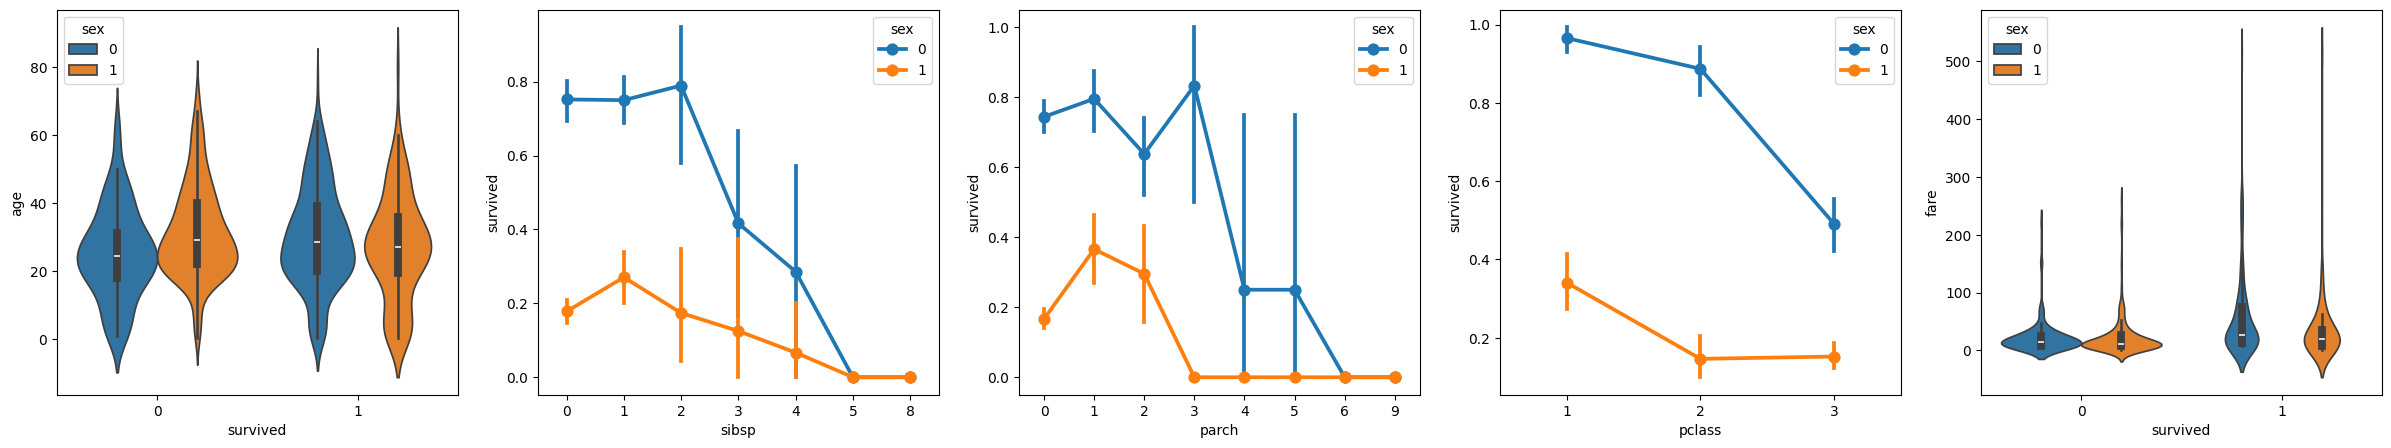

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

fig, axs = plt.subplots(ncols=5, figsize=(30,5)) # Visualize to see relation between data types
sns.violinplot(x="survived", y="age", hue="sex", data=data, ax=axs[0])
sns.pointplot(x="sibsp", y="survived", hue="sex", data=data, ax=axs[1])
sns.pointplot(x="parch", y="survived", hue="sex", data=data, ax=axs[2])
sns.pointplot(x="pclass", y="survived", hue="sex", data=data, ax=axs[3])
sns.violinplot(x="survived", y="fare", hue="sex", data=data, ax=axs[4])


In [13]:
data.replace({'male': 1, 'female': 0}, inplace=True)

In [14]:
data.corr(numeric_only=True).abs()[["survived"]] # Find the correlation

,survived
pclass,0.312469
survived,1.000000
sex,0.528693
age,0.055512
sibsp,0.027825
parch,0.082660
fare,0.244265
body,NaN


In [15]:
data['relatives'] = data.apply (lambda row: int((row['sibsp'] + row['parch']) > 0), axis=1)
data.corr(numeric_only=True).abs()[["survived"]] # Find the correlation


,survived
pclass,0.312469
survived,1.000000
sex,0.528693
age,0.055512
sibsp,0.027825
parch,0.082660
fare,0.244265
body,NaN
relatives,0.201719


In [ ]:
data = data[['sex', 'pclass','age','relatives','fare','survived']].dropna() # Only keep the high correlation value types

In [21]:
from sklearn.model_selection import train_test_split # Split the data set for test and train
x_train, x_test, y_train, y_test = train_test_split(data[['sex','pclass','age','relatives','fare']], data.survived, test_size=0.2, random_state=0)

In [22]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(x_train) # Normalize the dataset
X_test = sc.transform(x_test)

In [23]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(X_train, y_train) # Train the model


GaussianNB()

In [ ]:
from sklearn import metrics
predict_test = model.predict(X_test)
print(metrics.accuracy_score(y_test, predict_test)) # Print the accuracy score

0.7464114832535885


In [25]:
# Use a Neural Network to train the model
from keras.models import Sequential
from keras.layers import Dense

model = Sequential()


In [26]:
model.add(Dense(5, kernel_initializer = 'uniform', activation = 'relu', input_dim = 5)) # 5 dims for 5 inputs
model.add(Dense(5, kernel_initializer = 'uniform', activation = 'relu'))
model.add(Dense(1, kernel_initializer = 'uniform', activation = 'sigmoid')) # 1 dim output as 0 or 1 indicating survival condition

/Users/resit.aydin/Desktop/test/.venv/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [27]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                 │ (None, 5)              │            30 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 5)              │            30 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │             6 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 66 (264.00 B)

 Trainable params: 66 (264.00 B)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model.compile(optimizer="adam", loss='binary_crossentropy', metrics=['accuracy'])
model.fit(X_train, y_train, batch_size=32, epochs=50) # Train the model for 50 epochs with the batch size of 32
# Define the optimizer, loss function and metrics then build the model. 

Epoch 1/50
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 933us/step - accuracy: 0.7945 - loss: 0.4373
Epoch 2/50
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 947us/step - accuracy: 0.7789 - loss: 0.4509
Epoch 3/50
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 859us/step - accuracy: 0.7935 - loss: 0.4637
Epoch 4/50
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 728us/step - accuracy: 0.7833 - loss: 0.4667
Epoch 5/50
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 703us/step - accuracy: 0.7837 - loss: 0.4400
Epoch 6/50
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 699us/step - accuracy: 0.7951 - loss: 0.4430
Epoch 7/50
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 664us/step - accuracy: 0.7808 - loss: 0.4474
Epoch 8/50
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 748us/step - accuracy: 0.7830 - loss: 0.4565
Epoch 9/50
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 665us/step - accuracy: 0.7997 - loss: 0.4329
Epoch 10/50
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 665us/step - accuracy: 0.7804 - loss: 0.4637
Epoch 11/50
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 700us/step - accuracy: 0.7954 - loss: 0.4484
Epoch 12/50
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 685us/step

In [30]:
y_pred = np.rint(model.predict(X_test).flatten())
print(metrics.accuracy_score(y_test, y_pred)) # Test the model on the test data and display the results

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
0.7894736842105263
